In [ ]:
!pip install plotly
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns
import plotly as ps
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
import pandas as pd
data= pd.read_csv("/content/drive/MyDrive/Dataset/Cov 19/covid_19_clean_complete.csv",parse_dates=["Date"])

In [ ]:

data.rename(columns={"Country/Region":"region"},inplace=True)


In [ ]:
data.head()

,Province/State,region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [ ]:
data['active'] = data['Confirmed']- data['Deaths']-data['Recovered']

In [ ]:
data.head()

,Province/State,region,Lat,Long,Date,Confirmed,Deaths,Recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0


In [ ]:
top=data[data['Date']==data['Date'].max()]

In [ ]:
top

,Province/State,region,Lat,Long,Date,Confirmed,Deaths,Recovered,active
18910,NaN,Thailand,15.0000,101.0000,2020-03-23,599.0,1.0,44.0,554.0
18911,NaN,Japan,36.0000,138.0000,2020-03-23,1086.0,40.0,235.0,811.0
18912,NaN,Singapore,1.2833,103.8333,2020-03-23,455.0,2.0,144.0,309.0
18913,NaN,Nepal,28.1667,84.2500,2020-03-23,2.0,0.0,1.0,1.0
18914,NaN,Malaysia,2.5000,112.5000,2020-03-23,1306.0,10.0,139.0,1157.0
...,...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,2020-03-23,0.0,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,2020-03-23,0.0,1.0,0.0,-1.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,2020-03-23,0.0,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,2020-03-23,0.0,0.0,0.0,0.0


In [ ]:
world=top.groupby("region")['Confirmed','active','Deaths'].sum().reset_index()

In [ ]:
world

In [ ]:
figure=px.choropleth(world,locations="region",locationmode="country names",color="active",hover_name="region",
                    range_color=[1,2000],color_continuous_scale="blues",title="Contries with active cases")

In [ ]:
figure.show()

In [ ]:
#Total Confrimed cases grouped by date
total_cases= data.groupby("Date")['Date',"Confirmed"].sum().reset_index()
total_cases

,Date,Confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0
...,...,...
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0


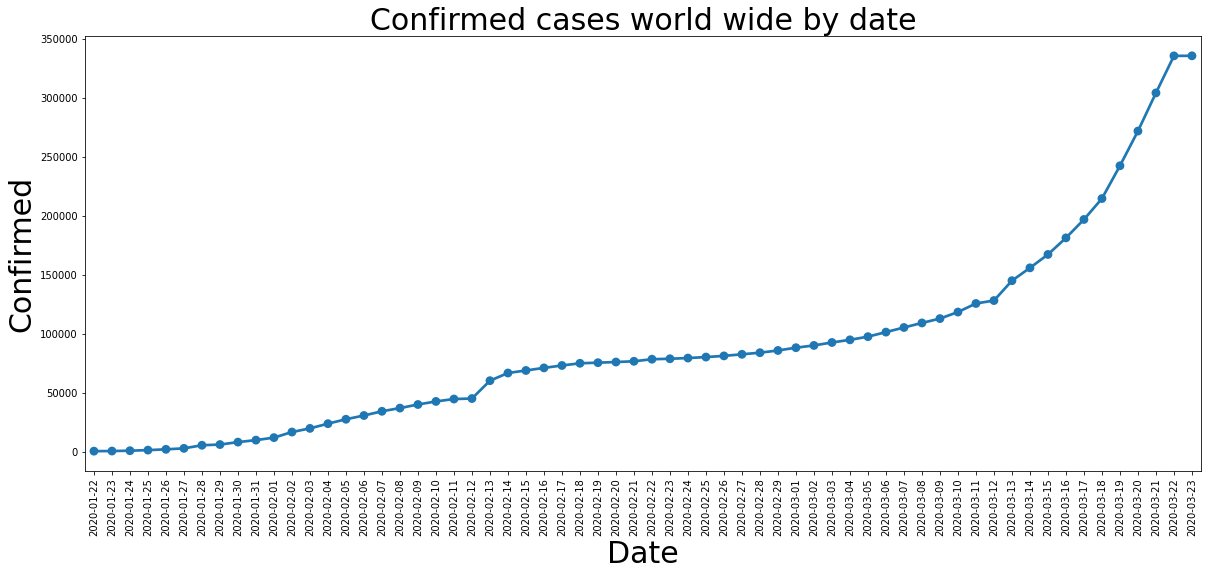

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel("Dates", fontsize=30)
plt.ylabel("Total cases", fontsize=30)
plt.title("Confirmed cases world wide by date", fontsize=30)
ax=sns.pointplot(x=total_cases.Date.dt.date,y=total_cases.Confirmed)

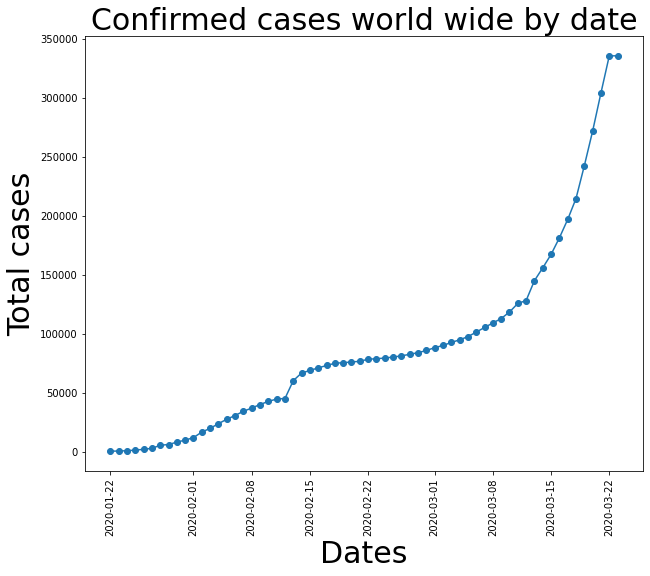

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel("Dates", fontsize=30)
plt.ylabel("Total cases", fontsize=30)
plt.title("Confirmed cases world wide by date", fontsize=30)
plt.scatter(total_cases.Date,total_cases.Confirmed)
plt.plot(total_cases.Date,total_cases.Confirmed)


In [ ]:
top_active=top.groupby("region")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_active

,region,active
0,Italy,46638.0
1,US,32681.0
2,Germany,24513.0
3,Spain,24421.0
4,France,13170.0
5,Iran,12022.0
6,Switzerland,7016.0
7,South Korea,5884.0
8,United Kingdom,5392.0
9,China,5351.0


Text(0.5, 1.0, 'Active cases by country')

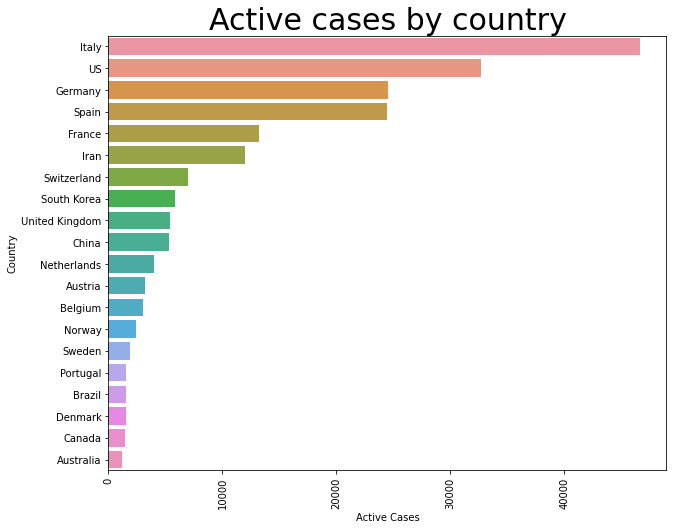

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=10)
plt.xticks(fontsize=10)
ax=sns.barplot(x=top_active.active,y=top_active.region)
ax.set(xlabel="Active Cases",ylabel="Country")
plt.title("Active cases by country", fontsize=30)

Text(0.5, 1.0, 'Deaths by country')

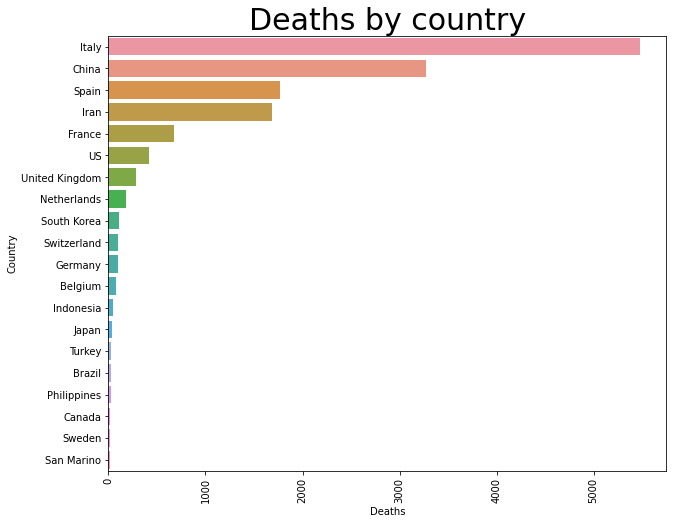

In [ ]:
top_active=top.groupby("region")["Deaths"].sum().sort_values(ascending=False).head(20).reset_index()
plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=10)
plt.xticks(fontsize=10)
ax=sns.barplot(x=top_active.Deaths,y=top_active.region)
ax.set(xlabel="Deaths",ylabel="Country")
plt.title("Deaths by country", fontsize=30)

Text(0.5, 1.0, 'Recovered cases by country')

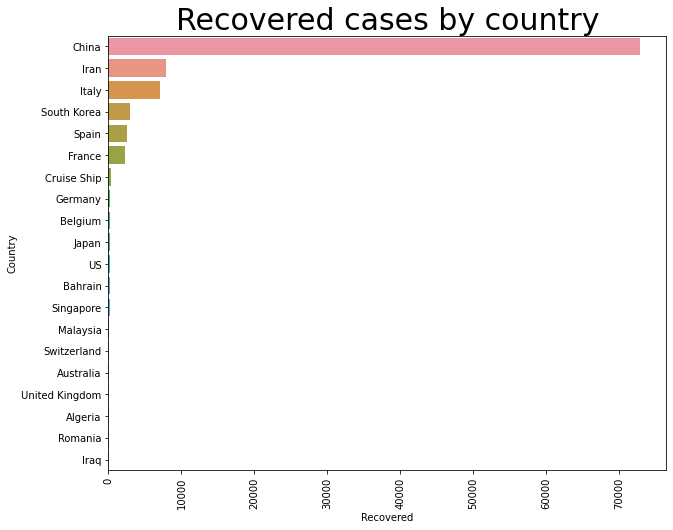

In [ ]:
top_active=top.groupby("region")["Recovered"].sum().sort_values(ascending=False).head(20).reset_index()
plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=10)
plt.xticks(fontsize=10)
sns.barplot(x=top_active.Recovered,y=top_active.region)
ax.set(xlabel="Recovered",ylabel="Country")
plt.title("Recovered cases by country", fontsize=30)

In [ ]:
india=data[(data.region=="India") & ((data.Confirmed>0) | (data.Deaths>0) | (data.Recovered>0) | (data.active>0))]
inda_gp=india.groupby(by="Date")['Confirmed',"Deaths","Recovered","active"].sum().reset_index()
china=data[(data.region=="China") & ((data.Confirmed>0) | (data.Deaths>0) | (data.Recovered>0) | (data.active>0))]
china_gp=china.groupby(by="Date")['Confirmed',"Deaths","Recovered","active"].sum().reset_index()
italy=data[(data.region=="Italy") & ((data.Confirmed>0) | (data.Deaths>0) | (data.Recovered>0) | (data.active>0))]
italy_gp=italy.groupby(by="Date")['Confirmed',"Deaths","Recovered","active"].sum().reset_index()
us=data[(data.region=="US")]
us_gp=us.groupby(by="Date")['Confirmed',"Deaths","Recovered","active"].sum().reset_index()
us_gp=us_gp.iloc[33:].reset_index().drop("index",axis=1)



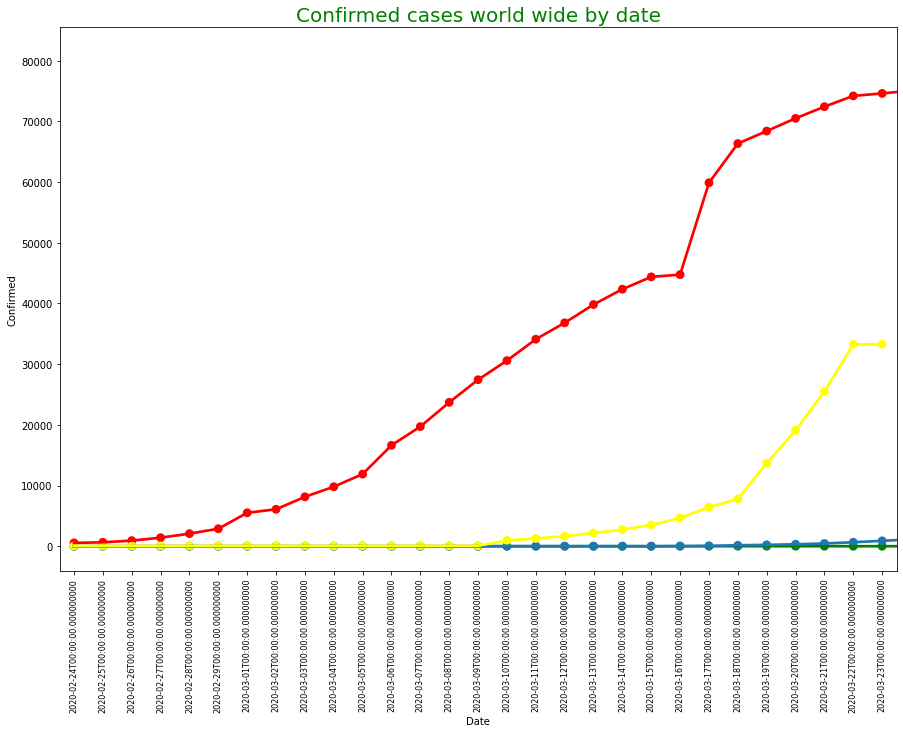

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90,fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel("Dates", fontsize=10)
plt.ylabel("Total cases", fontsize=10)
plt.title("Confirmed cases world wide by date", fontsize=20,color="green")
sns.pointplot(x=inda_gp.Date,y=inda_gp.Confirmed,color="green")
sns.pointplot(x=china_gp.Date,y=china_gp.Confirmed,color="red")
sns.pointplot(x=italy_gp.Date,y=italy_gp.Confirmed)
sns.pointplot(x=us_gp.Date,y=us_gp.Confirmed ,color="yellow") 

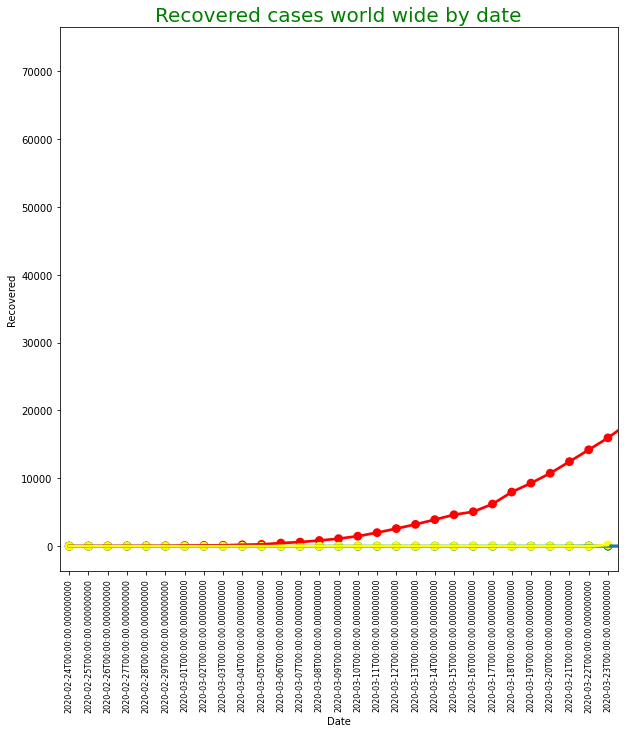

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90,fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel("Dates", fontsize=10)
plt.ylabel("Total cases", fontsize=10)
plt.title("Recovered cases world wide by date", fontsize=20,color="green")
sns.pointplot(x=inda_gp.Date,y=inda_gp.Recovered,color="green")
sns.pointplot(x=china_gp.Date,y=china_gp.Recovered,color="red")
sns.pointplot(x=italy_gp.Date,y=italy_gp.Recovered)
sns.pointplot(x=us_gp.Date,y=us_gp.Recovered ,color="yellow") 
plt.show()


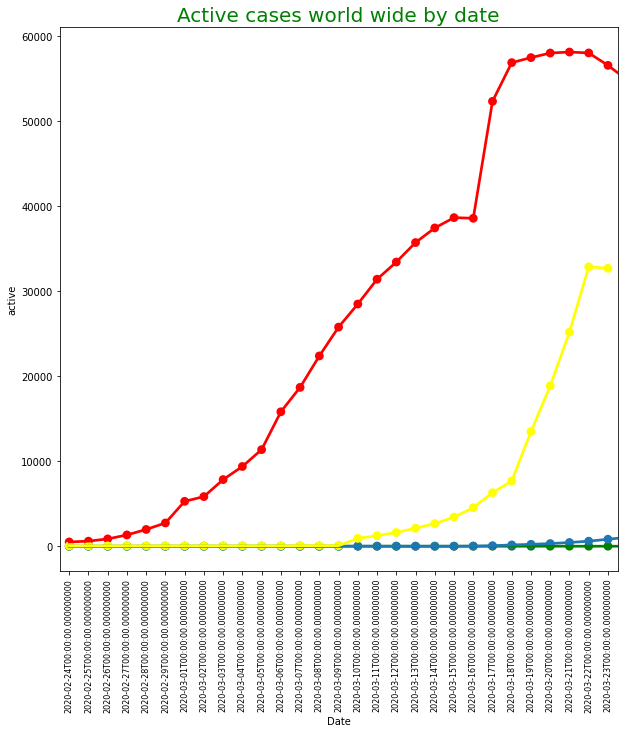

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90,fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel("Dates", fontsize=10)
plt.ylabel("Total cases", fontsize=10)
plt.title("Active cases world wide by date", fontsize=20,color="green")
sns.pointplot(x=inda_gp.Date,y=inda_gp.active,color="green")
sns.pointplot(x=china_gp.Date,y=china_gp.active,color="red")
sns.pointplot(x=italy_gp.Date,y=italy_gp.active)
sns.pointplot(x=us_gp.Date,y=us_gp.active ,color="yellow") 

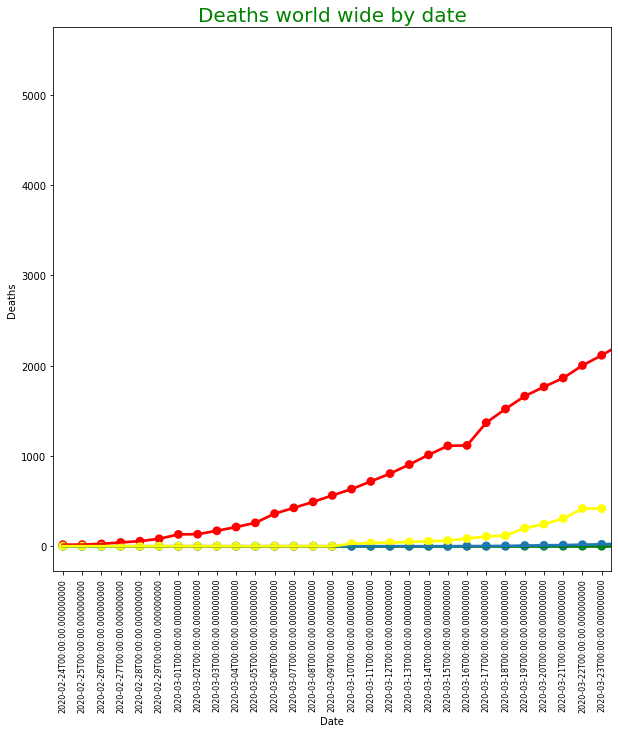

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90,fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel("Dates", fontsize=10)
plt.ylabel("Total cases", fontsize=10)
plt.title("Deaths world wide by date", fontsize=20,color="green")
sns.pointplot(x=inda_gp.Date,y=inda_gp.Deaths,color="green")
sns.pointplot(x=china_gp.Date,y=china_gp.Deaths,color="red")
sns.pointplot(x=italy_gp.Date,y=italy_gp.Deaths)
sns.pointplot(x=us_gp.Date,y=us_gp.Deaths ,color="yellow") 


In [ ]:
#analysis of covid cases in India

In [ ]:
df_india=pd.read_excel("/content/drive/MyDrive/Dataset/Cov 19/covid_19_india.xlsx")
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [ ]:
df_india=df_india.drop(labels="S. No.",axis=1)


In [ ]:
df_india["total_confirmed"]=df_india["Total Confirmed cases (Indian National)"]+df_india["Total Confirmed cases ( Foreign National )"]

In [ ]:
df_india.rename(columns={"Name of State / UT":"state","Total Confirmed cases (Indian National)":"ConfirmedIndia","Total Confirmed cases ( Foreign National )":"ConfirmedForeign"},inplace=True)

In [ ]:
df_india['active']=df_india["total_confirmed"]-df_india["Cured"]-df_india["Death"]
df_india

,state,ConfirmedIndia,ConfirmedForeign,Cured,Death,total_confirmed,active
0,Andhra Pradesh,9,0,0,0,9,9
1,Bihar,3,0,0,1,3,2
2,Chhattisgarh,1,0,0,0,1,1
3,Delhi,30,1,6,1,31,24
4,Gujarat,32,1,0,1,33,32
5,Haryana,14,14,11,0,28,17
6,Himachal Pradesh,3,0,0,1,3,2
7,Karnataka,41,0,3,1,41,37
8,Kerala,101,8,4,0,109,105
9,Madhya Pradesh,9,0,0,0,9,9


In [ ]:
tot_cases=df_india.groupby("state")["active"].sum().sort_values(ascending=False).to_frame()
tot_cases


,active
state,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [ ]:
tot_cases.style.background_gradient(cmap="YlOrRd")

,active
state,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [ ]:
df_india

,state,ConfirmedIndia,ConfirmedForeign,Cured,Death,total_confirmed,active
0,Andhra Pradesh,9,0,0,0,9,9
1,Bihar,3,0,0,1,3,2
2,Chhattisgarh,1,0,0,0,1,1
3,Delhi,30,1,6,1,31,24
4,Gujarat,32,1,0,1,33,32
5,Haryana,14,14,11,0,28,17
6,Himachal Pradesh,3,0,0,1,3,2
7,Karnataka,41,0,3,1,41,37
8,Kerala,101,8,4,0,109,105
9,Madhya Pradesh,9,0,0,0,9,9


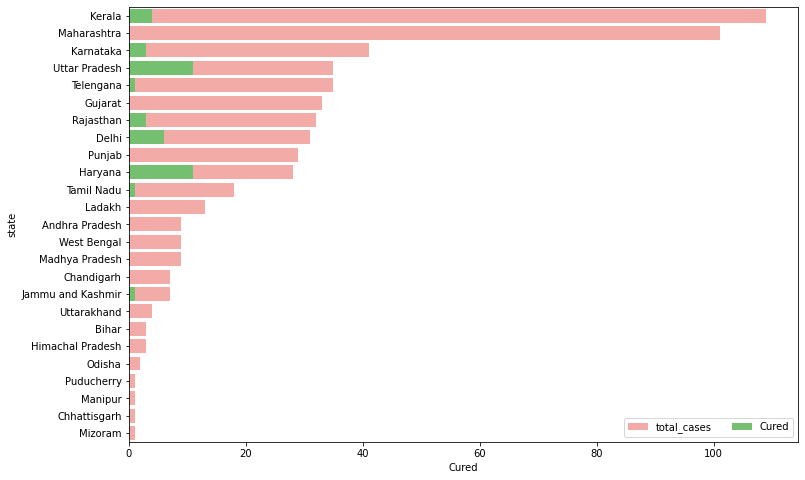

In [ ]:
f,ax=plt.subplots(figsize=(12,8))
data_s=df_india[['state','Cured','Death',"total_confirmed"]]
data_s.sort_values("total_confirmed",ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot("total_confirmed","state", data=data_s,label="total_cases",color="r")
sns.set_color_codes("muted")
sns.barplot("Cured","state", data=data_s,label="Cured",color="g")
ax.legend(ncol=2,loc="lower right",frameon=True)


In [ ]:
db_perday=pd.read_excel("/content/drive/MyDrive/Dataset/Cov 19/per_day_cases.xlsx")
db_perday.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=db_perday['Date'],y=db_perday['Total Cases'],mode="lines+markers",name="Daily Total Cases"))
fig.update_layout(title_text="Trend of COVID cases in India",plot_bgcolor="rgb(200,230,200)")
fig.show()

In [ ]:
#covid cases in India per day
fig=px.bar(db_perday,x="Date",y="New Cases",barmode="group",height=400)
fig.update_layout(title_text="Trend of new COVID cases in India",plot_bgcolor="rgb(200,200,230)")
fig.show()

# **Insights into covid cases globally**

In [ ]:

data_global_conf=pd.read_csv("/content/drive/MyDrive/Dataset/Cov 19/time_series_covid19_confirmed_global.csv")
data_global_rec=pd.read_csv("/content/drive/MyDrive/Dataset/Cov 19/time_series_covid19_recovered_global.csv")
data_global_death=pd.read_csv("/content/drive/MyDrive/Dataset/Cov 19/time_series_covid19_deaths_global.csv")

In [ ]:
data_global_conf.rename(columns={"Country/Region":"Country"},inplace=True)
data_global_rec.rename(columns={"Country/Region":"Country"},inplace=True)
data_global_death.rename(columns={"Country/Region":"Country"},inplace=True)

In [ ]:
data_global_conf

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
237,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
238,Recovered,Canada,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
239,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
df_in=data.query('region=="India"').groupby("Date")[["Confirmed","Deaths","Recovered"]].sum().reset_index()
india_conf,india_deaths,india_rec=df_in[['Date',"Confirmed"]],df_in[['Date',"Deaths"]],df_in[['Date',"Recovered"]]

In [ ]:
india_conf

,Date,Confirmed
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
57,2020-03-19,194.0
58,2020-03-20,244.0
59,2020-03-21,330.0
60,2020-03-22,396.0


In [ ]:
confirmed=data.groupby("Date").sum()['Confirmed'].reset_index()
deaths=data.groupby("Date").sum()['Deaths'].reset_index()
recovered=data.groupby("Date").sum()['Recovered'].reset_index()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='confirmed',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=recovered['Date'],y=recovered['Recovered'],mode='lines+markers',name='recovered',line=dict(color='green')))
fig.add_trace(go.Scatter(x=deaths['Date'],y=deaths['Deaths'],mode='lines+markers',name='deaths',line=dict(color='red')))
fig.update_layout(title_text="Worldwide covid cases",plot_bgcolor="rgb(200,200,230)",xaxis_tickfont_size=14,yaxis=dict(title="Number of Cases"))
fig.show()